In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob

def round_decimal(val,num_digits):
    factor=np.power(10,num_digits)
    return int(val * factor)/factor

 aho.py~		   contributing.md	   PPN.ipynb   Untitled1.ipynb
 bin			   DataVis_forward.ipynb   README.md   Untitled2.ipynb
 config			   DataVis_iotool.ipynb    test        Untitled.ipynb
'Confusion matrix.ipynb'   log_trash		   test.cfg    UnwrapDemo.ipynb
 ConfusionMatrix.ipynb	   mlreco		   test.cfg~   weights_trash


# Load analysis output csv files

In [8]:
df=pd.concat([pd.read_csv(f) for f in glob.glob('/gpfs/slac/staas/fs1/g/neutrino/kterao/ghost_busters/inference-6-16-12/iter-0039999/deghosting*.csv')])

false_negative = df.nonghost2nonghost.mean()
true_positive  = df.ghost2ghost.mean()
combined       = ((df.num_ghost_points * df.ghost2ghost + df.num_nonghost_points * df.nonghost2nonghost) / (df.num_ghost_points + df.num_nonghost_points)).sum()/len(df)

print('de-ghosting false-negative :',round_decimal(false_negative,3))
print('de-ghosting true-positive  :',round_decimal(true_positive,3))
print('combined accuracy:',round_decimal(combined,3))

de-ghosting false-negative : 0.915
de-ghosting true-positive  : 0.912
combined accuracy: 0.913


In [9]:
df.keys()

Index(['num_ghost_points', 'num_nonghost_points', 'idx', 'ghost2ghost',
       'nonghost2nonghost', 'ghost_acc', 'uresnet_acc', 'confusion_0_0',
       'confusion_0_1', 'confusion_0_2', 'confusion_0_3', 'confusion_0_4',
       'confusion_1_0', 'confusion_1_1', 'confusion_1_2', 'confusion_1_3',
       'confusion_1_4', 'confusion_2_0', 'confusion_2_1', 'confusion_2_2',
       'confusion_2_3', 'confusion_2_4', 'confusion_3_0', 'confusion_3_1',
       'confusion_3_2', 'confusion_3_3', 'confusion_3_4', 'confusion_4_0',
       'confusion_4_1', 'confusion_4_2', 'confusion_4_3', 'confusion_4_4',
       'acc_class0', 'acc_class1', 'acc_class2', 'acc_class3', 'acc_class4',
       'num_true_pix_class0', 'num_true_pix_class1', 'num_true_pix_class2',
       'num_true_pix_class3', 'num_true_pix_class4', 'num_pred_pix_class0',
       'num_pred_pix_class1', 'num_pred_pix_class2', 'num_pred_pix_class3',
       'num_pred_pix_class4', 'num_pred_pix_true_class0',
       'num_pred_pix_true_class1', 'num_pr

# Confusion matrix

In [10]:
def plot_cm(df):
    CLASSES = [0,1,2,3,4]

    num_labels  = len(CLASSES)
    class_names = [str(n) for n in CLASSES]

    mat=np.zeros(shape=(num_labels+1,num_labels),dtype=np.float32)

    for label in CLASSES:
        total = getattr(df,'ghost_true_positives_class%d' % label).values
        nonzero = np.where(total>0)
        for pred in CLASSES:
            count = getattr(df,'confusion_%d_%d' % (label,pred)).values
            mat[pred][label] = (count[nonzero]/total[nonzero]).mean()
        total_true = getattr(df,'num_true_pix_class%d' % label).values
        nonzero = np.where(total_true>0)
        mat[5][label] = 1. - (total[nonzero] / total_true[nonzero]).mean()

    fig, ax = plt.subplots(figsize=(12,8),facecolor='w')
    im=plt.imshow(mat.T,cmap=plt.cm.Blues)
    plt.colorbar(im, ax=ax)
    ax.set_xticks(np.arange(num_labels+1))
    ax.set_xticklabels(class_names + ['Busted'],fontsize=16)
    ax.set_yticks(np.arange(num_labels))
    ax.set_yticklabels(class_names,fontsize=16)
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    plt.setp(ax.get_yticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    ax.set_xlabel('Prediction',fontsize=20)
    ax.set_ylabel('True Label',fontsize=20)
    for i in range(mat.shape[0]):
        for j in range(mat.shape[1]):
            ax.text(i,j, '%.3f' % (mat[i, j]),
                    ha="center", va="center", fontsize=16,
                    color="white" if mat[i,j] > (0.5*mat.max()) else "black")
    ax.xaxis.set_label_position('top')
    ax.xaxis.set_ticks_position('top')
    plt.xlim(-0.5,5.5)
    plt.ylim(4.5,-0.5)
    plt.show()
    

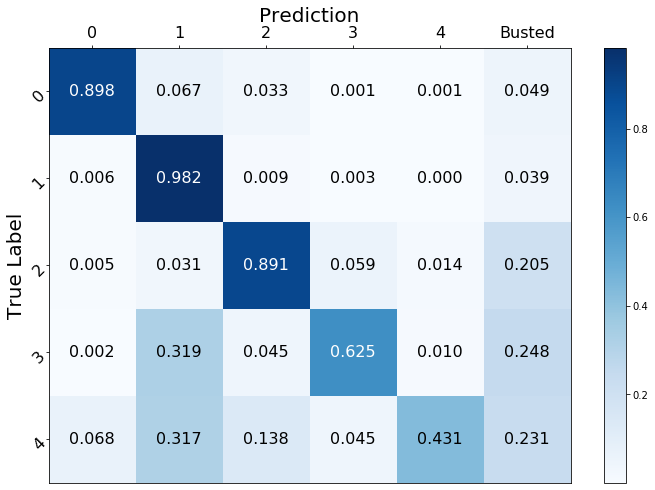

In [11]:
plot_cm(df)